In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from keras.layers import Input, Dense, Dropout
from keras.models import Model, Sequential
from sklearn.metrics import roc_curve, auc,roc_auc_score
from sklearn.model_selection import train_test_split
import pandas as pd
from matplotlib import gridspec
from scipy import stats
from sklearn import preprocessing
import os
os.environ["CUDA_VISIBLE_DEVICES"]="2"

# restart kernel
# config = tf.ConfigProto()
# config.gpu_options.allow_growth = True

In [50]:
#datafile="/data1/users/bpnachman/gaia/gaiascan_l315.0_b66.4_ra197.7_dec4.0.npy"
datafile="./data/gaiascan_l315.0_b66.4_ra197.7_dec4.0.npy"
gaiadata=np.load(datafile,allow_pickle=True)

In [109]:
gaiadata2 = np.array(gaiadata[:,[9,8,6,7,4,5]]).astype('float32')

In [110]:
gaiadata2 = gaiadata2[np.sum(np.isnan(gaiadata2),axis=1)==0]
center_dec=0.5*(np.max(gaiadata2[:,2])+np.min(gaiadata2[:,2]))
center_ra=0.5*(np.max(gaiadata2[:,3])+np.min(gaiadata2[:,3]))
radius=np.sqrt((gaiadata2[:,2]-center_dec)**2+(gaiadata2[:,3]-center_ra)**2)
gaiadata2=gaiadata2[radius<15]
np.random.shuffle(gaiadata2)

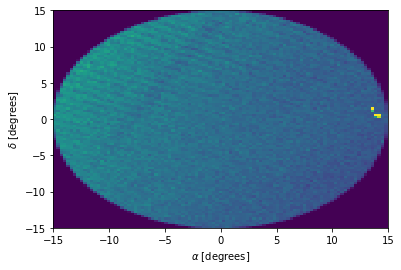

In [111]:
import matplotlib
#norm = matplotlib.colors.LogNorm()
a,_,_,_=plt.hist2d(gaiadata2[:,3],gaiadata2[:,2],bins=[np.linspace(-15,15,100),np.linspace(-15,15,100)],vmin = 0, vmax = 500)
#plt.scatter(gaiadata3[:,3],gaiadata3[:,2],color='red',s=0.2)
plt.xlabel(r"$\alpha$ [degrees]")
plt.ylabel(r"$\delta$ [degrees]")
plt.show()


In [118]:
def remove_circle(data,center,radius=0.5):
    keep = np.sqrt((data[:,3]-center[0])**2 + (data[:,2]-center[1])**2) > radius
    return data[keep]


def remove_bright_spots(data,radius=0.5,stop_drop = 0.5, show_plots = True):
    while True:

        pixellated_data, alpha_coords, delta_coords = np.histogram2d(data[:,3],data[:,2],100)

        if show_plots:
            a,_,_,_=plt.hist2d(data[:,3],data[:,2],bins=[np.linspace(-15,15,100),np.linspace(-15,15,100)],vmin = 0, vmax = 500)
            #plt.scatter(gaiadata3[:,3],gaiadata3[:,2],color='red',s=0.2)
            plt.xlabel(r"$\alpha$ [degrees]")
            plt.ylabel(r"$\delta$ [degrees]")
            plt.show()



            plt.hist(pixellated_data.flatten(),bins=100)
            plt.semilogy()
            plt.show()


        sorted_pixels = np.sort(pixellated_data.flatten())
        if stop_drop * sorted_pixels[-1] < sorted_pixels[-2]:
            break

        i_alpha, i_delta = np.unravel_index(np.argmax(pixellated_data),pixellated_data.shape)
        brightest_pixel_coordinates = np.array([0.5*(alpha_coords[i_alpha]+alpha_coords[i_alpha+1]),0.5*(delta_coords[i_delta]+delta_coords[i_delta+1])])

        data=remove_circle(data,brightest_pixel_coordinates,radius=radius)
    return data

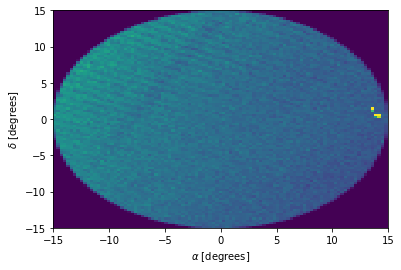

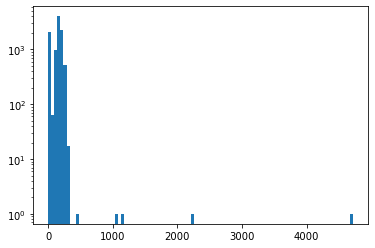

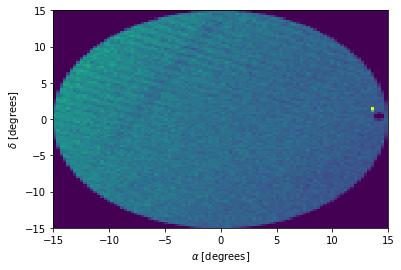

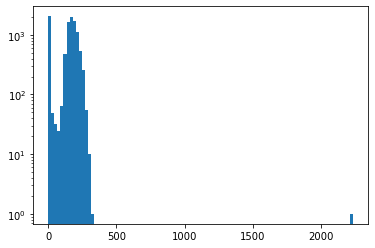

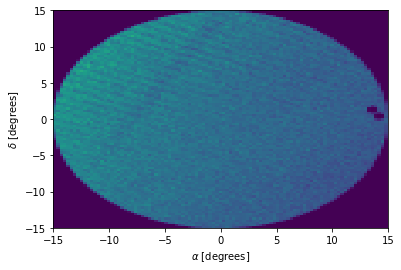

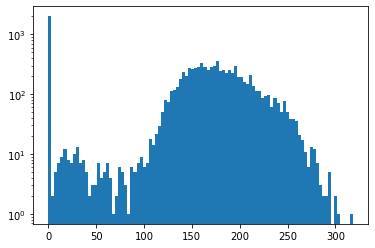

In [120]:
new_data = remove_bright_spots(gaiadata2)